# Ćwiczenia 1
W trakcie ćwiczeń implementowana będzie metoda przeszukiwania - Metoda gradientu prostego.
Celem ćwiczeń jest implementacja metody gradientu prostego dla dwóch funkcji oraz przebadanie wpływu rozmiaru kroku dla różnych (losowych) punktów początkowych. Należy zwizualizować proces minimalizacji na wykresie 2D.

## Punktacja:
 - obliczenie gradientów funkcji 1 pkt
 - implementacja kroku gradientu prostego 1 pkt
 - przeprowadzenie przeszukiwania minimum na obu funkcjach 1 pkt
 - wizualizacja przeszukiwania 1 pkt


In [ ]:
from typing import Callable, Tuple
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Funkcje do przeszukania:
\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

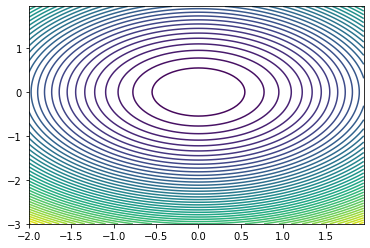

In [ ]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.contour(X, Y, Z, 50)

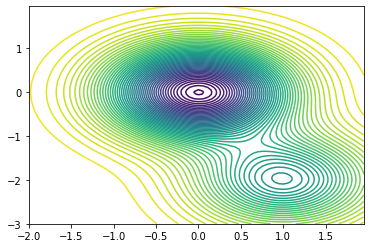

In [ ]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.contour(X, Y, Z, 50)

Gradienty funkcji
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [ ]:
class SimpleGradientDescent:
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha:float=0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def _calc_Z_value(self):
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace)>0:
            plt.scatter(self.trace[:,0], self.trace[:,1], s=10)

    def calculate_func_vale(self, x1:float, x2:float) -> float:
        return(self.func(x1, x2))

    def calculate_func_grad(self, x1:float, x2:float) -> Tuple[float, float]:
        return(self.grad_func(x1, x2))

    def gradient_descent_step(self, x1:float, x2:float) -> Tuple[float, float]:
        return((self.alpha*x1, self.alpha*x2))
    
    def plot(self):
          self._calc_Z_value()
          plt.figure()
          plt.contour(self.X, self.Y, self.Z, 50)
          traceX = [element[0] for element in self.trace]
          traceY = [element[1] for element in self.trace]
          plt.plot(traceX, traceY, label = "points")
          plt.title("gradient descent")
          plt.xlabel("X")
          plt.ylabel("Y", rotation=0)
          plt.legend()
          plt.grid(True) 
          plt.xlim([-2, 2])
          plt.ylim([-2, 2])
          plt.savefig("plot3.png")
          plt.show()

    def minimize(self, x1_init:float, x2_init:float, steps:int, verbose:int=0, plot:bool=False)->float:
        i = 0
        e = 10**-12
        reductions = 5
        x1 = x1_init
        x2 = x2_init
        step = self.calculate_func_grad(x1, x2)
        self.trace = []
        while(i < steps and (abs(step[0])>e and abs(step[1])>e)):
          step = self.calculate_func_grad(x1, x2)
          step = self.gradient_descent_step(step[0], step[1])
          k = 0
          while(k < reductions):
            if(self.calculate_func_vale(x1, x2) > self.calculate_func_vale(x1-step[0], x2-step[1])):
              self.trace.append((x1, x2))
              x1 -= step[0]
              x2 -= step[1]
              if (verbose == 2):
                print(x1)
                print(x2)
              break
            step = self.gradient_descent_step(step[0], step[1])
            k += 1
          i += 1
        if(verbose == 1):
          print(x1)
          print(x2)
        if plot:
          self.plot()
        return self.calculate_func_vale(x1, x2)

# Funkcja 1

In [ ]:
def f(x1, x2)->float:
  return(x1**2 + x2**2)

def grad_f(x1, x2)->Tuple[float, float]:
  return((2*x1, 2*x2))

def first_example():
  first = SimpleGradientDescent(func=f, grad_func=grad_f, alpha=0.1)
  print(first.minimize(1, -2, 1000000, verbose = 1, plot=True))


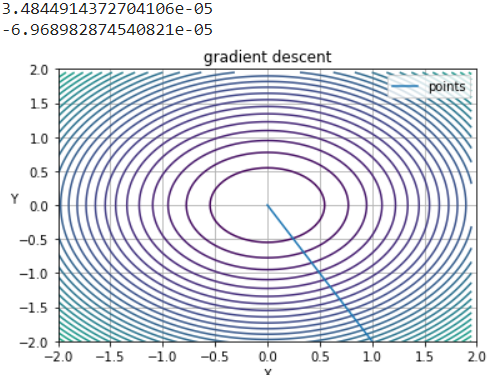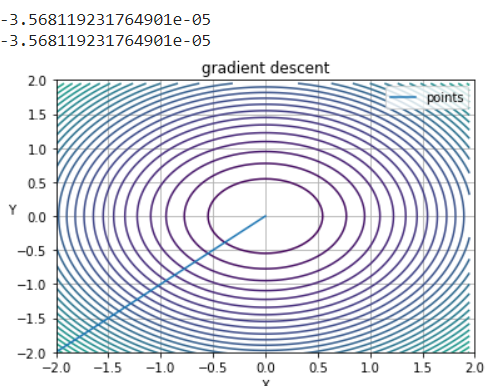

# Funkcja 2

In [ ]:
def g(x1, x2)->float:
  return(1.5-np.exp(-x1**2-x2**2)-0.5*np.exp(-(x1-1)**2-(x2+2)**2))

def grad_g(x1, x2)->Tuple[float, float]:
  first = 2*x1*np.exp(-x1**2-x2**2) + (x1-1)*np.exp(-(x1-1)**2-(x2+2)**2)
  second = 2*x2*np.exp(-x1**2-x2**2)-0.5*np.exp(-(x1-1)**2-(x2+2)**2)
  return((first, second))

def second_example():
  second = SimpleGradientDescent(func=g, grad_func=grad_g, alpha = 0.01)
  print(second.minimize(1.5, -1.1, 1000000, 1, True))


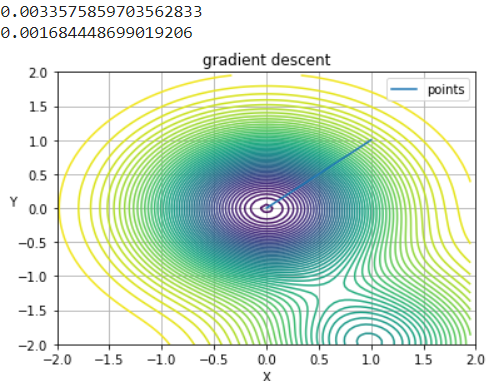

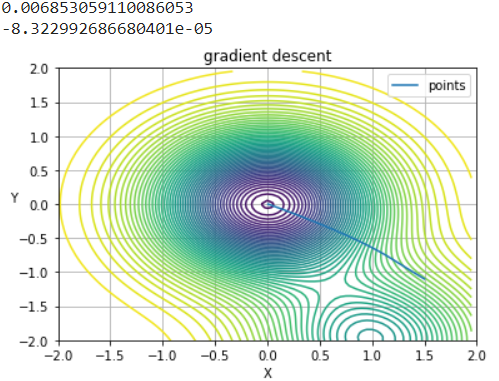